In [1]:
from pandas_datareader import data, wb
import pandas as pd
import requests
import json
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import dateparser
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
def dateparse (time):    
    return dateparser.parse(time)


df = pd.read_csv('./1025_31.csv', header = None, index_col = 0,parse_dates=True,date_parser=dateparse, squeeze = True);

# df.to_datetime(df.index, unit='s')
s=pd.Series(df, name='Bitcoin Price (USD)')
s.index.name='Date'
s.reset_index()
bitcoin_prices=pd.DataFrame(s)
bitcoin_prices.head()

/opt/conda/lib/python3.6/site-packages/tzlocal/unix.py:177: UserWarning: Can not find any timezone configuration, defaulting to UTC.
  warnings.warn("Can not find any timezone configuration, defaulting to UTC.")


,Bitcoin Price (USD)
Date,
2021-10-24 23:00:00,60852.22
2021-10-25 00:00:00,61813.40
2021-10-25 01:00:00,61737.24
2021-10-25 02:00:00,61954.76
2021-10-25 03:00:00,62084.26


In [3]:
s=pd.Series(df, name='Bitcoin Price (USD)')
s.index.name='Date'
s.reset_index()
bitcoin_prices=pd.DataFrame(s)
bitcoin_prices.head()

,Bitcoin Price (USD)
Date,
2021-10-24 23:00:00,60852.22
2021-10-25 00:00:00,61813.40
2021-10-25 01:00:00,61737.24
2021-10-25 02:00:00,61954.76
2021-10-25 03:00:00,62084.26


In [4]:
bitcoin_prices.index.hour

Int64Index([23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date', length=169)

<AxesSubplot:xlabel='Date'>

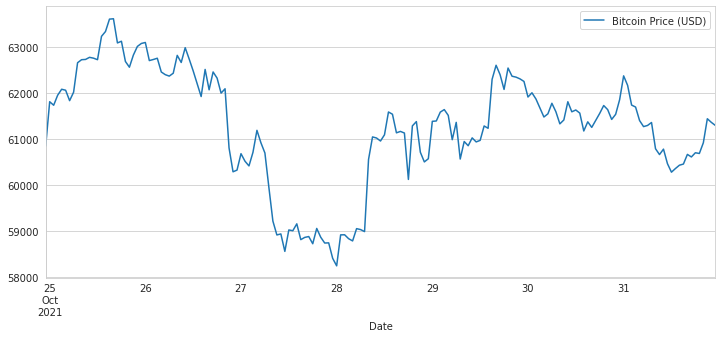

In [5]:
bitcoin_prices.plot(figsize=(12,5))

In [6]:
bitcoin_prices.describe()

,Bitcoin Price (USD)
count,169.000000
mean,61271.352367
std,1247.893506
min,58250.010000
25%,60685.250000
50%,61404.850000
75%,62207.820000
max,63615.160000


In [7]:
#投報率
bitcoin_prices['returns']=bitcoin_prices/bitcoin_prices.shift(1)
bitcoin_prices['log_returns']=np.log(bitcoin_prices['returns'])

<AxesSubplot:xlabel='Date'>

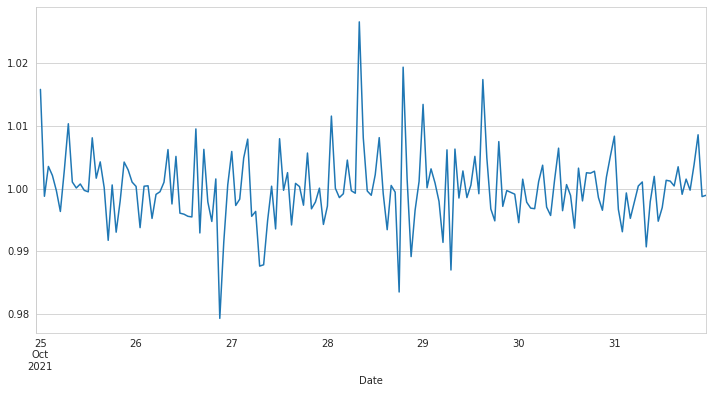

In [8]:
bitcoin_prices['returns'].plot(kind='line',figsize=(12,6))

<AxesSubplot:xlabel='Date'>

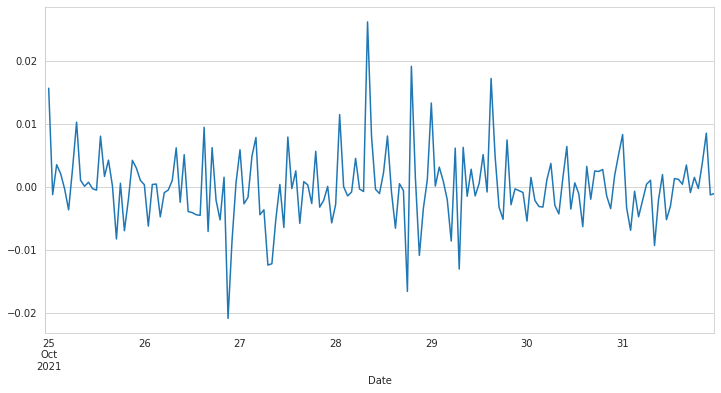

In [18]:
bitcoin_prices['log_returns'].plot(kind='line',figsize=(12,6))

In [9]:
m=loc=bitcoin_prices['log_returns'][1:].mean()
s=loc=bitcoin_prices['log_returns'][1:].std()

In [10]:
stats.normaltest(bitcoin_prices['log_returns'], nan_policy='omit')

NormaltestResult(statistic=27.273058836873226, pvalue=1.1959981868644419e-06)

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

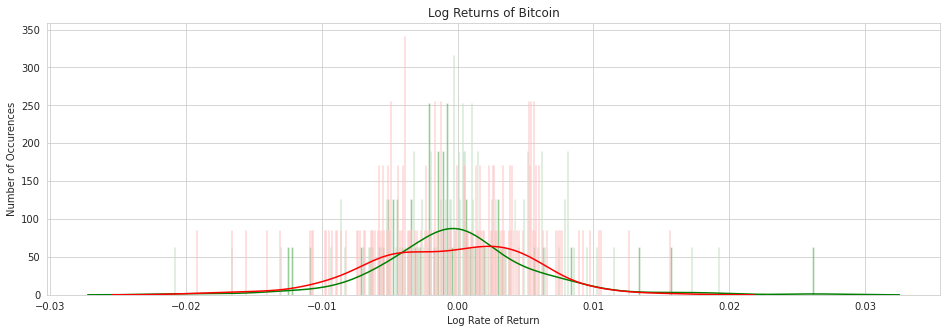

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s,len(bitcoin_prices)-1), color='red', bins=500)
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [12]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.10829539669273647, pvalue=0.03597536637181886)

In [13]:
from statsmodels.stats.diagnostic import lilliefors

In [14]:
lilliefors(bitcoin_prices['log_returns'][1:])

(0.10829539669273647, 0.0009999999999998899)

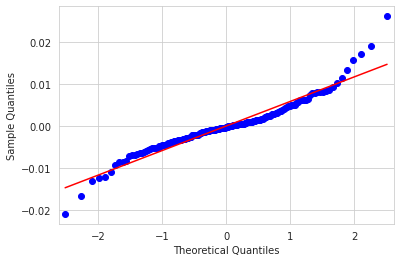

In [15]:
plt.show(sm.qqplot(bitcoin_prices['log_returns'][1:],line='s'))

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Returns of Bitcoin')

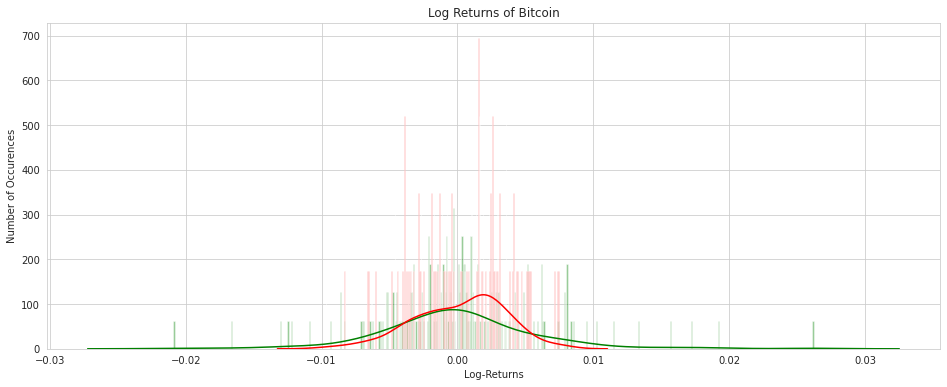

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.distplot(bitcoin_prices['log_returns'][1:], bins=500, color='green')
sns.distplot(stats.norm.rvs(m,s/2,len(bitcoin_prices['log_returns'])-1), color='red', bins=500)
plt.xlabel('Log-Returns')
plt.ylabel('Number of Occurences')
plt.title('Log Returns of Bitcoin')

In [17]:
stats.kstest((bitcoin_prices['log_returns'][1:]-m)*2/s,cdf=stats.distributions.norm.cdf)

KstestResult(statistic=0.11666087233475375, pvalue=0.018956238301433236)

In [18]:
bitcoin_prices.index=pd.to_datetime(bitcoin_prices.index)

In [19]:
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns
Date,,,
2021-10-24 23:00:00,60852.22,NaN,NaN
2021-10-25 00:00:00,61813.40,1.015795,0.015672
2021-10-25 01:00:00,61737.24,0.998768,-0.001233
2021-10-25 02:00:00,61954.76,1.003523,0.003517
2021-10-25 03:00:00,62084.26,1.002090,0.002088


In [20]:
type(bitcoin_prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
bitcoin_prices.dropna(subset=['returns', 'log_returns'], inplace=True)
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns
Date,,,
2021-10-25 00:00:00,61813.40,1.015795,0.015672
2021-10-25 01:00:00,61737.24,0.998768,-0.001233
2021-10-25 02:00:00,61954.76,1.003523,0.003517
2021-10-25 03:00:00,62084.26,1.002090,0.002088
2021-10-25 04:00:00,62063.39,0.999664,-0.000336


In [22]:
bitcoin_prices.describe()

,Bitcoin Price (USD),returns,log_returns
count,168.000000,168.000000,168.000000
mean,61273.847202,1.000061,0.000044
std,1251.201340,0.005872,0.005863
min,58250.010000,0.979317,-0.020900
25%,60681.455000,0.996939,-0.003066
50%,61407.735000,0.999715,-0.000285
75%,62219.292500,1.002522,0.002519
max,63615.160000,1.026557,0.026210


In [23]:
# standard_deviations=bitcoin_prices.groupby([bitcoin_prices.index.date,bitcoin_prices.index.hour]).std()

In [24]:
# standard_deviations.index.names=['Day','Hour']

In [25]:
# standard_deviations.head()

In [26]:
from sklearn import cluster

In [27]:
X =np.asarray(bitcoin_prices['returns']).reshape(-1,1)

In [28]:
distortions=[]
for k in range(2,20):
    distortions.append(cluster.KMeans(n_clusters=k).fit(X).inertia_)

In [29]:
print(distortions)

[0.002862268659744697, 0.0016197547530585, 0.0010100300707409694, 0.0006061920676640801, 0.00044424177404617726, 0.0003389090903301574, 0.00026704250909042866, 0.00021207732858394808, 0.00015493755277775587, 0.00012430202209565036, 9.828719622163465e-05, 8.002976097559225e-05, 6.721571336583714e-05, 5.938060601334324e-05, 5.098687827994408e-05, 4.2500316122545604e-05, 3.549164572399084e-05, 2.8207792720319904e-05]


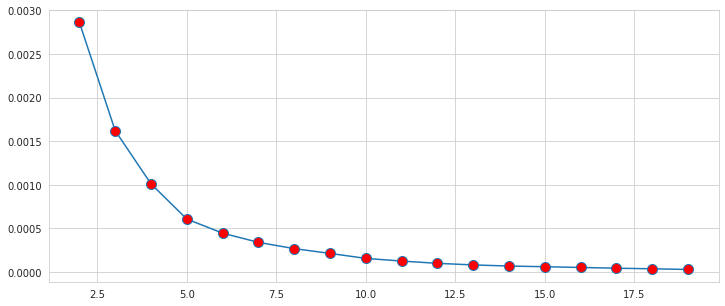

In [30]:
plt.figure(figsize=(12,5))
plt.plot(range(2,20), distortions, marker='o', markerfacecolor='red', markersize=10)

In [31]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [32]:
print(kmeans.cluster_centers_)

[[0.98798828]
 [1.00054492]
 [1.00659051]
 [1.01849235]
 [0.99597487]]


In [33]:
bitcoin_prices['cluster_center']=list(map(lambda x: kmeans.cluster_centers_[x][0], kmeans.predict(X)))

In [34]:
bitcoin_prices.head()

,Bitcoin Price (USD),returns,log_returns,cluster_center
Date,,,,
2021-10-25 00:00:00,61813.40,1.015795,0.015672,1.018492
2021-10-25 01:00:00,61737.24,0.998768,-0.001233,1.000545
2021-10-25 02:00:00,61954.76,1.003523,0.003517,1.000545
2021-10-25 03:00:00,62084.26,1.002090,0.002088,1.000545
2021-10-25 04:00:00,62063.39,0.999664,-0.000336,1.000545


Text(0, 0.5, 'Volatility')

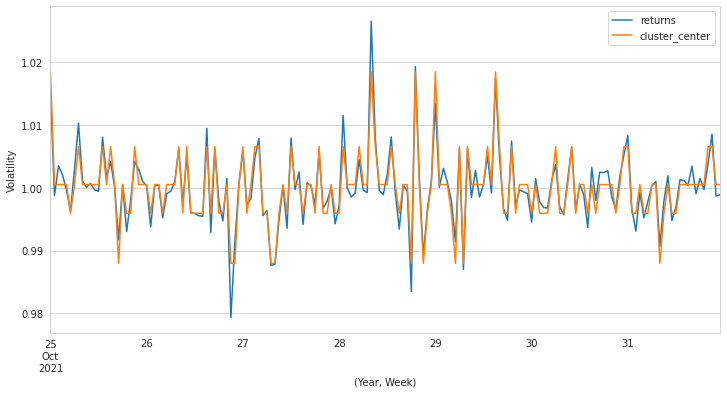

In [35]:
bitcoin_prices[['returns','cluster_center']].plot(figsize=(12,6))
plt.xlabel('(Year, Week)')
plt.ylabel('Volatility')

In [36]:
d_for_clusters={}
for i in range(5):
    d_for_clusters['Cluster '+str(i)] = [list(kmeans.predict(X)).count(i),kmeans.cluster_centers_[i][0]]

In [37]:
pd.DataFrame(d_for_clusters,columns=['Cluster '+str(i) for i in range(5)],
                       index=['Number of Points','Center'])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Number of Points,10.000000,78.000000,28.000000,5.000000,47.000000
Center,0.987988,1.000545,1.006591,1.018492,0.995975


In [38]:
d_counts={}
for k in range(5):
    for j in range(5):
        d_counts[(j,k)]=0 
L=list(kmeans.predict(X))
for i in range(len(L)-1):
    d_counts[(L[i],L[i+1])]+=1

In [39]:
prob_matrix=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        prob_matrix[i,j]+=d_counts[(i,j)]
sums=[sum(prob_matrix[i]) for i in range(5)]
for i in range(5):
    prob_matrix[i]/=sums[i]
prob_matrix=prob_matrix.round(2)*100
prob_matrix=np.char.add(prob_matrix.astype(int).astype(str),'%')
cluster_switching_probs = pd.DataFrame(prob_matrix, columns=['Cluster '+str(i) for i in range(5)],
             index=['Cluster '+str(i) for i in range(5)])
cluster_switching_probs.index.name, cluster_switching_probs.columns.name='From', 'To'
cluster_switching_probs['Center']=kmeans.cluster_centers_.round(5)
cluster_switching_probs

To,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Center
From,,,,,,
Cluster 0,20%,20%,20%,10%,30%,0.98799
Cluster 1,6%,51%,17%,4%,22%,1.00054
Cluster 2,4%,43%,11%,0%,43%,1.00659
Cluster 3,0%,60%,40%,0%,0%,1.01849
Cluster 4,4%,47%,17%,0%,32%,0.99597
